### **PROBLEM STATEMENT:-**
#### Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 8005 images belonging to 1 classes.


In [7]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 2023 images belonging to 1 classes.


In [8]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [9]:
cnn = tf.keras.models.Sequential()

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [11]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [15]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [17]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [18]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 [==============================] - 30s 94ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2/15
251/251 [==============================] - 22s 88ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/15
251/251 [==============================] - 22s 89ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.4476e-04 - val_accuracy: 1.0000
Epoch 4/15
251/251 [==============================] - 22s 89ms/step - loss: 4.1040e-04 - accuracy: 1.0000 - val_loss: 2.8819e-04 - val_accuracy: 1.0000
Epoch 5/15
251/251 [==============================] - 21s 84ms/step - loss: 1.4516e-04 - accuracy: 1.0000 - val_loss: 6.3352e-05 - val_accuracy: 1.0000
Epoch 6/15
251/251 [==============================] - 22s 89ms/step - loss: 3.2998e-05 - accuracy: 1.0000 - val_loss: 1.3757e-05 - val_accuracy: 1.0000
Epoch 7/15
251/251 [==============================] - 21s 86ms/step - loss: 2.0593e-04 - accuracy: 1.0000 - 

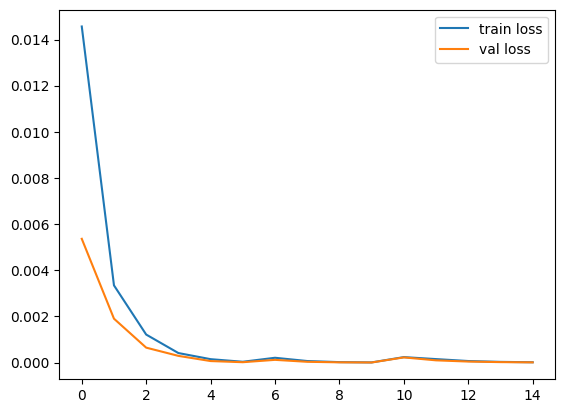

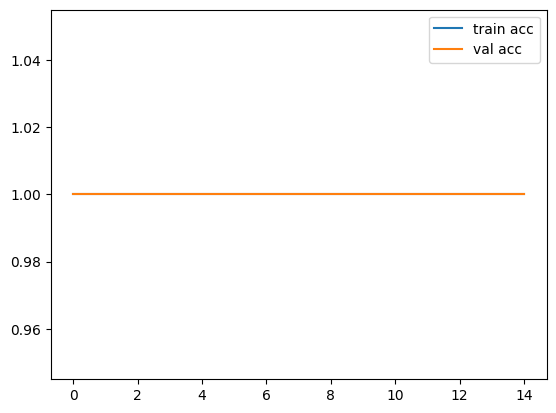

In [19]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step
The image classified is cat


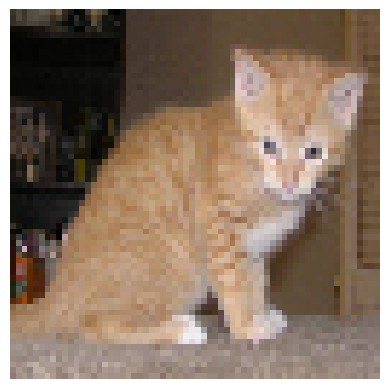

In [31]:
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
timage = image.load_img('/content/test_set/test_set/cats/cat.4003.jpg', target_size = (64,64))
test_image = image.img_to_array(timage)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

plt.imshow(timage)
plt.axis('off')  # Turn off axis labels
plt.show()